In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 

In [2]:
df=pd.read_excel("D:/Journal paper work/Serbia_data_new/summer.xlsx")

In [3]:
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
0,2010-05-01 00:00:00,2010,5,1,0,0.0,10.294,0.0000,0.0000,0.0,0.0,0.0002,1.1614,2010-5-1,121,0.26007,-3.141593,120.312513
1,2010-05-01 01:00:00,2010,5,1,1,0.0,9.816,0.0000,0.0000,0.0,0.0,0.0000,1.1646,2010-5-1,121,0.26007,-2.879793,118.773333
2,2010-05-01 02:00:00,2010,5,1,2,0.0,9.306,0.0000,0.0000,0.0,0.0,0.0002,1.1677,2010-5-1,121,0.26007,-2.617994,114.382559
3,2010-05-01 03:00:00,2010,5,1,3,0.0,8.776,6.1665,17.9908,0.0,0.0,0.0015,1.1714,2010-5-1,121,0.26007,-2.356194,107.687782
4,2010-05-01 04:00:00,2010,5,1,4,0.0,10.382,117.7852,212.5853,0.0,0.0,0.0127,1.1748,2010-5-1,121,0.26007,-2.094395,99.310337


In [4]:
lower_limit = 4
upper_limit = 17
df = df[(df['Hour'] >= lower_limit) & (df['Hour'] <= upper_limit)]

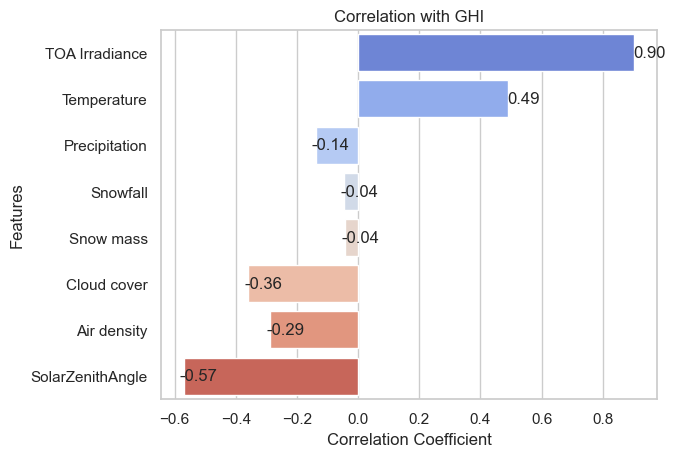

In [5]:
from sklearn import preprocessing

selected_feature = 'GHI'
selected_features = ['TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
selected_data = df[selected_features + [selected_feature]].values

scaler = preprocessing.StandardScaler().fit(selected_data)
selected_data = scaler.transform(selected_data)
corr_coef = np.corrcoef(selected_data.T)
corr_with_selected_feature = corr_coef[-1, :-1]


corr_data = pd.DataFrame({'Selected Feature': selected_features, 'Correlation Coefficient': corr_with_selected_feature})
sns.set(style='whitegrid')
ax = sns.barplot(x='Correlation Coefficient', y='Selected Feature', data=corr_data, palette='coolwarm')


ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Features')
ax.set_title(f'Correlation with {selected_feature}')

for i, corr in enumerate(corr_with_selected_feature):
    ax.text(corr + 0.05, i, f'{corr:.2f}', ha='center', va='center')

plt.show()

In [6]:
max_value1 = df['GHI'].max()
min_value1 = df['GHI'].min()

max_value2 = df['Temperature'].max()
min_value2 = df['Temperature'].min()

max_value3 = df['Cloud cover'].max()
min_value3 = df['Cloud cover'].min()

max_value4 = df['TOA Irradiance'].max()
min_value4 = df['TOA Irradiance'].min()

max_value5 = df['Air density'].max()
min_value5 = df['Air density'].min()

max_value6 = df['SolarZenithAngle'].max()
min_value6 = df['SolarZenithAngle'].min()

print("GHI(max):", max_value1)
print("GHI(min):", min_value1)

print("Temp(max):", max_value2)
print("Temp(min):", min_value2)

print("Cloud cover(max):", max_value3)
print("Cloud cover(min):", min_value3)

print("TOA Irradiance(max):", max_value4)
print("TOA Irradiance(min):", min_value4)

print("Air density(max):", max_value5)
print("Air density(min):", min_value5)

print("SolarZenithAngle(max):", max_value6)
print("SolarZenithAngle(min):", min_value6)

GHI(max): 984.1595
GHI(min): 0.8568
Temp(max): 38.319
Temp(min): 3.1
Cloud cover(max): 0.9916
Cloud cover(min): 0.0
TOA Irradiance(max): 1229.8772
TOA Irradiance(min): 4.46
Air density(max): 1.2289
Air density(min): 1.084
SolarZenithAngle(max): 104.8896618458576
SolarZenithAngle(min): 21.33681715318634


In [7]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['GHI','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
4,2010-05-01 04:00:00,2010,5,1,4,0.0,0.206763,0.118914,0.169840,0.0,0.0,0.012808,0.626639,2010-5-1,121,0.26007,-2.094395,0.933224
5,2010-05-01 05:00:00,2010,5,1,5,0.0,0.280417,0.306896,0.366150,0.0,0.0,0.041045,0.627329,2010-5-1,121,0.26007,-1.832596,0.819300
6,2010-05-01 06:00:00,2010,5,1,6,0.0,0.351316,0.499720,0.550599,0.0,0.0,0.037313,0.576259,2010-5-1,121,0.26007,-1.570796,0.696880
7,2010-05-01 07:00:00,2010,5,1,7,0.0,0.435220,0.673092,0.710633,0.0,0.0,0.014119,0.501035,2010-5-1,121,0.26007,-1.308997,0.570235
8,2010-05-01 08:00:00,2010,5,1,8,0.0,0.496777,0.810366,0.835340,0.0,0.0,0.012203,0.449275,2010-5-1,121,0.26007,-1.047198,0.443509


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
X=df[['Hour','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']]
y=df[['GHI']]

In [10]:
split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

max_value = 984.1595
min_value = 0
original_rmse = rmse_rf * (max_value - min_value) + min_value
original_mae = mae_rf * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_rf)

C:\Users\suraj\AppData\Local\Temp\ipykernel_27348\156360335.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RMSE: 36.04476409106545
MAE: 22.677531755433673
R-squared: 0.9825427246751406


In [11]:
y_test = np.squeeze(y_test)
max_val = 984.1595
min_val = 0
y_test_actual = y_test * (max_val - min_val) + min_val
y_pred_actual = y_pred * (max_val - min_val) + min_val
y_test_actual = np.round(y_test_actual, 3)
y_pred_actual = np.round(y_pred_actual, 3)

cross_checking = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
print(cross_checking.head(20))

        Actual  Predicted
23912  384.101    355.531
23913  407.179    412.879
23914  423.244    512.728
23915  441.833    475.975
23916  403.636    417.512
23917  347.377    355.881
23918  262.125    254.475
23919  158.164    136.109
23920   65.471     54.590
23921   10.961     11.005
23932   65.022     72.701
23933  165.793    161.834
23934  283.177    284.897
23935  373.864    366.579
23936  433.272    473.199
23937  411.700    474.158
23938  327.241    344.971
23939  251.460    324.875
23940  205.177    296.414
23941  143.004    222.499


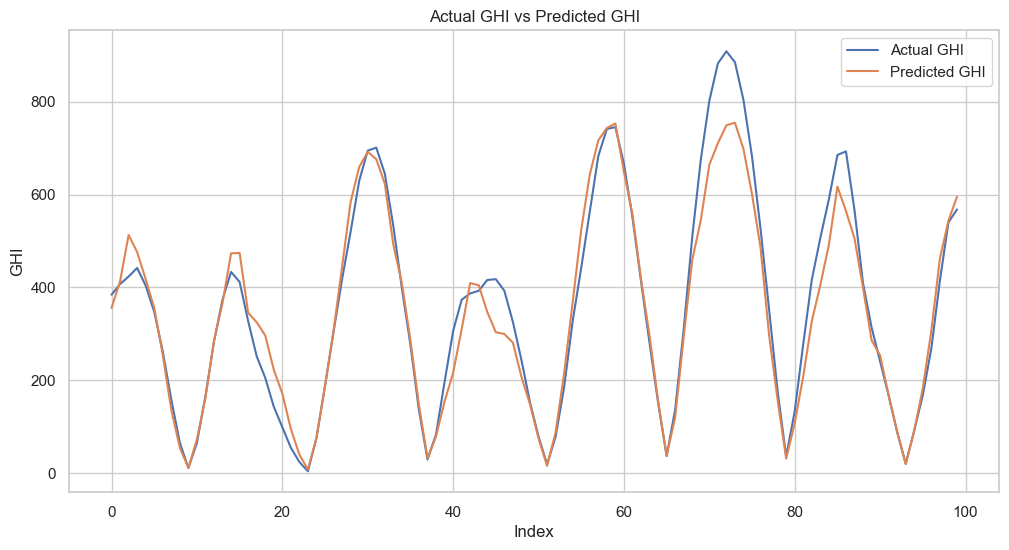

In [12]:
num_values = 100 
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(num_values), cross_checking['Actual'][:num_values], label='Actual GHI')
plt.plot(range(num_values), cross_checking['Predicted'][:num_values], label='Predicted GHI')

plt.xlabel('Index')
plt.ylabel('GHI')
plt.title('Actual GHI vs Predicted GHI')

plt.legend()
plt.show()

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)


max_value = 984.1595
min_value = 0
original_rmse = rmse_svr * (max_value - min_value) + min_value
original_mae = mae_svr * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_svr)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 53.7532500183328
MAE: 40.116651583390706
R-squared: 0.9611758870603758


In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


max_value = 984.1595
min_value = 0
original_rmse = rmse_knn * (max_value - min_value) + min_value
original_mae = mae_knn * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_knn)

RMSE: 42.878091124482076
MAE: 28.550338940300694
R-squared: 0.9752962449595013


In [15]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(40, 40, 40, 40, 40), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

max_value = 984.1595
min_value = 0
original_rmse = rmse_ann * (max_value - min_value) + min_value
original_mae = mae_ann * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_ann)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 48.88771975413501
MAE: 34.14746531146487
R-squared: 0.9678862036646442
